In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Data Import: Combined_broadband_deployment_rate_and_demographic_info

In [3]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.Combined_broadband_deployment_rate_and_demographic_info`

Downloading: 100%|██████████████████████| 2833/2833 [00:01<00:00, 1591.14rows/s]


In [4]:
data.head()

,Broadband_Deployment_rate,County_code,State_name,County_name,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,...,Race_american_indian_alaska_native_ratio,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio
0,0.757470,10001,Delaware,Kent County,272.386051,185.379579,75.058556,0.711799,0.288201,0.481055,...,0.005865,0.000461,0.070196,0.129859,0.799945,0.069790,0.716761,0.213448,0.721942,0.278058
1,0.750557,10003,Delaware,New Castle County,1256.203521,1142.270735,58.769825,0.951068,0.048932,0.481812,...,0.001889,0.000197,0.044935,0.194047,0.761019,0.053262,0.783376,0.163363,0.696636,0.303364
2,0.861779,10005,Delaware,Sussex County,182.642141,27.253834,90.256433,0.231927,0.768073,0.488800,...,0.004872,0.000322,0.077653,0.139605,0.782742,0.074750,0.695321,0.229929,0.775115,0.224885
3,0.696424,12001,Florida,Alachua County,277.551884,209.454005,59.938254,0.777506,0.222494,0.485377,...,0.002528,0.000502,0.036931,0.206484,0.756585,0.093491,0.754414,0.152095,0.544868,0.455132
4,0.607850,12005,Florida,Bay County,222.625086,188.240894,26.714694,0.875720,0.124280,0.495440,...,0.006291,0.000853,0.055860,0.131701,0.812439,0.142109,0.645708,0.212182,0.631331,0.368669


In [5]:
data.columns

Index(['Broadband_Deployment_rate', 'County_code', 'State_name', 'County_name',
       'Population_density', 'Urban_density', 'Rural_density', 'Urban_ratio',
       'Rural_ratio', 'Male_ratio', 'Female_ratio', 'Age_under_5_ratio',
       'Age_between_5_and_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_between_25_and_44_ratio', 'Age_between_45_and_64_ratio',
       'Age_above_65_ratio', 'Race_hispanic_ratio', 'Race_white_ratio',
       'Race_black_ratio', 'Race_asian_ratio',
       'Race_american_indian_alaska_native_ratio',
       'Race_native_hawaii_and_other_pacific_island_ratio',
       'Degree_not_high_school_ratio', 'Degree_college_ratio',
       'Degree_university_ratio', 'Insurance_none_ratio',
       'Insurance_equal_1_ratio', 'Insurance_equal_above_2_ratio',
       'Status_own_ratio', 'Status_rant_ratio'],
      dtype='object')

In [6]:
data['Gender ratio difference'] = data['Male_ratio']-data['Female_ratio']

In [7]:
print(len(data))
print(data.State_name.nunique())
print(data.County_name.nunique())
print(data.County_code.nunique())

2833
45
1697
2816


In [8]:
#Normalize 
cols_to_norm = ['Broadband_Deployment_rate','Population_density', 'Urban_density', 'Rural_density', 'Urban_ratio',
       'Rural_ratio', 'Male_ratio', 'Female_ratio', 'Age_under_5_ratio',
       'Age_between_5_and_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_between_25_and_44_ratio', 'Age_between_45_and_64_ratio',
       'Age_above_65_ratio', 'Race_hispanic_ratio', 'Race_white_ratio',
       'Race_black_ratio', 'Race_asian_ratio',
       'Race_american_indian_alaska_native_ratio',
       'Race_native_hawaii_and_other_pacific_island_ratio',
       'Degree_not_high_school_ratio', 'Degree_college_ratio',
       'Degree_university_ratio', 'Insurance_none_ratio',
       'Insurance_equal_1_ratio', 'Insurance_equal_above_2_ratio',
       'Status_own_ratio', 'Status_rant_ratio']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


###  State Level

#### 1. Summary

In [9]:
data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate',ascending=False)
data_state = data_state.reset_index()

In [10]:
data_state.head()

,State_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,South Dakota,0.911639,-0.128908,-0.111518,-0.955100,-0.419404,0.419404,0.172900,-0.172900,0.640251,...,-0.180820,-0.572047,0.236206,0.309112,0.143251,0.060571,-0.257529,-0.163101,0.163101,0.008345
1,Rhode Island,0.850915,0.435444,0.415752,1.660411,2.046650,-2.046650,-0.774347,0.774347,-1.104636,...,-0.177745,-0.714845,2.096151,-2.098732,-1.160479,1.046719,0.005996,-1.051690,1.051690,-0.033072
2,Kansas,0.789858,-0.112043,-0.098074,-0.801094,-0.383600,0.383600,0.014623,-0.014623,0.193465,...,-0.088555,-0.508145,0.202354,0.284884,-0.241896,0.050970,0.227504,0.064441,-0.064441,0.001424
3,North Dakota,0.774431,-0.131190,-0.111883,-1.031573,-0.378949,0.378949,0.443302,-0.443302,-0.271254,...,-0.173035,-0.574267,0.189729,0.375706,-0.438775,0.197570,0.270440,0.200944,-0.200944,0.020167
4,Minnesota,0.639956,-0.072523,-0.067181,-0.373922,-0.139149,0.139149,0.070503,-0.070503,0.139308,...,-0.105263,-0.826913,0.276066,0.537041,-0.975273,0.722397,0.217841,0.659050,-0.659050,0.003867


The top five states with highest deployment rate are South Dakota, Rhode Island, Kansas, North Dakota, and Minnesota.

In [11]:
data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate')
data_state = data_state.reset_index()
data_state2 = data_state.drop(['State_name'],axis=1)
data_state.head()

,State_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,Nevada,-1.240567,-0.111848,-0.093817,-1.008734,-0.007095,0.007095,1.152666,-1.152666,-0.127795,...,1.668263,0.029509,-0.172369,0.205077,0.110502,0.044430,-0.195550,-0.417260,0.417260,0.051183
1,New Mexico,-1.088406,-0.118878,-0.101725,-0.980022,-0.126782,0.126782,0.280795,-0.280795,0.029653,...,-0.087525,0.356610,-0.007857,-0.385033,-0.062858,-0.401816,0.620731,-0.034711,0.034711,0.013062
2,Louisiana,-0.929592,-0.057725,-0.054781,-0.150009,0.255836,-0.255836,0.091171,-0.091171,0.458701,...,-0.152255,0.807619,-0.560216,-0.123551,0.242675,0.138560,-0.484910,-0.014705,0.014705,0.004771
3,Mississippi,-0.899537,-0.107048,-0.105656,-0.024030,-0.337008,0.337008,-0.406511,0.406511,0.611280,...,-0.245250,0.927461,-0.585965,-0.221058,0.620789,-0.376415,-0.251524,-0.038212,0.038212,-0.016989
4,West Virginia,-0.878762,-0.089468,-0.095608,0.448392,-0.114900,0.114900,-0.090477,0.090477,-0.657346,...,-0.263237,0.475046,-0.546377,0.226544,-0.665096,0.203454,0.539859,0.409011,-0.409011,-0.003171


The top five states with lowest deployment rate are Nevada, New Mexico, Louisiana, Mississippi, and West Virginia

#### 2. Correlation

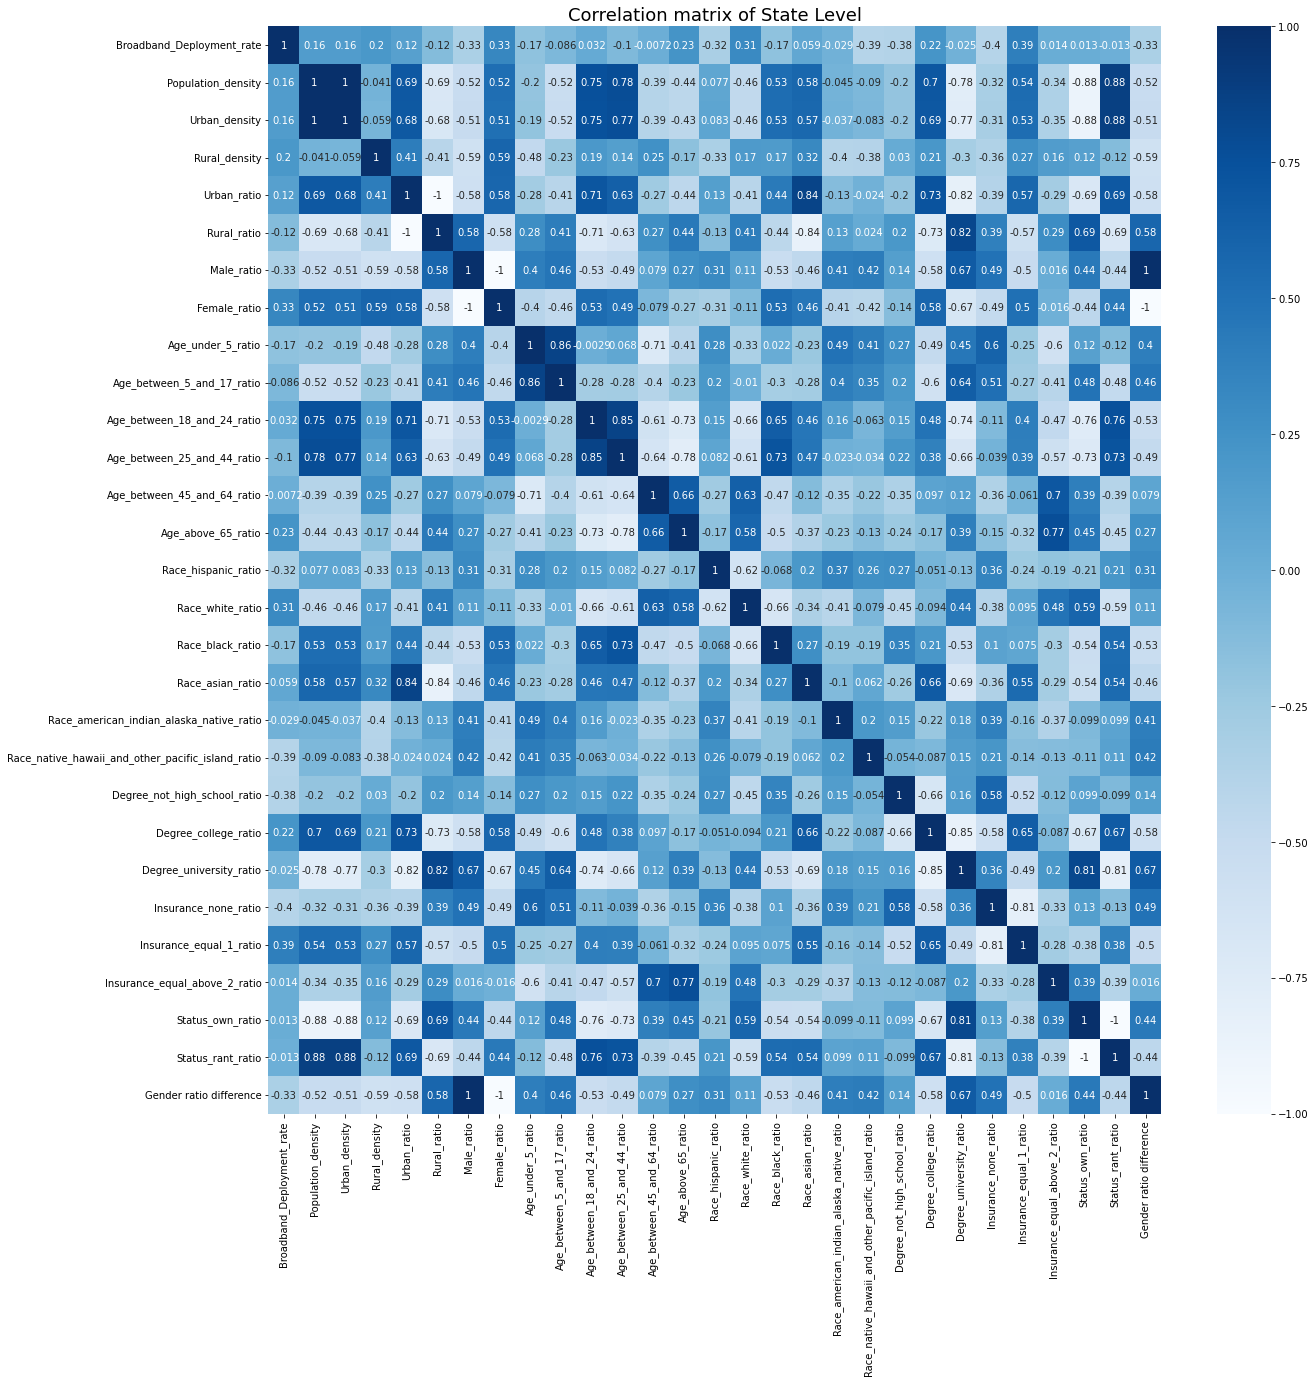

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data_state2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of State Level", fontdict = {'fontsize' : 18})
plt.show()

In [13]:
data_state2.corr().iloc[0].sort_values(ascending=False)[:11]

Broadband_Deployment_rate    1.000000
Insurance_equal_1_ratio      0.394680
Female_ratio                 0.332299
Race_white_ratio             0.307639
Age_above_65_ratio           0.230482
Degree_college_ratio         0.221973
Rural_density                0.199175
Population_density           0.162454
Urban_density                0.158886
Urban_ratio                  0.122066
Race_asian_ratio             0.058730
Name: Broadband_Deployment_rate, dtype: float64

From corelation table, the 10 most corelated to deloyment rate features are Insurance_equal_1_ratio, Female_ratio, Race_white_ratio, Age_above_65_ratio, Degree_college_ratio, Degree_college_ratio, Rural_density, Population_density, Urban_density, Urban_ratio, and Race_asian_ratio.

Text(0, 0.5, 'Broadband Deployment Rate')

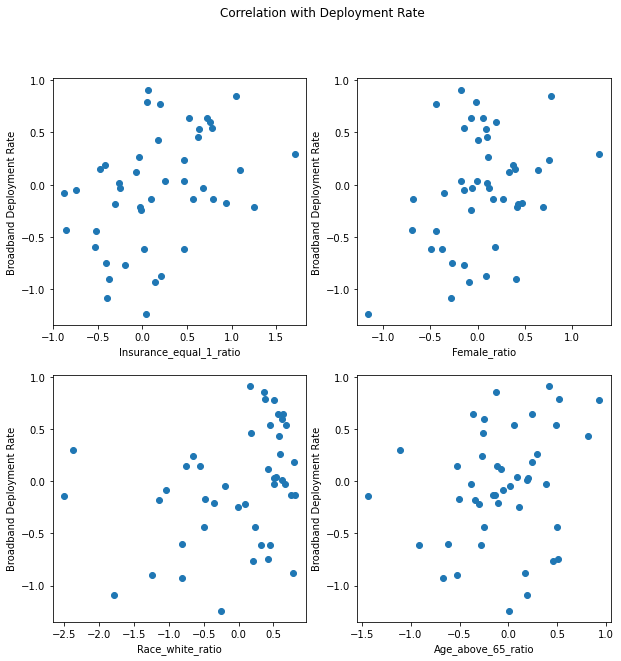

In [14]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_state2['Insurance_equal_1_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_state2['Female_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Female_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_state2['Race_white_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Race_white_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_state2['Age_above_65_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Age_above_65_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#ax5.scatter(data_state2['Degree_college_ratio'],data_state2['Broadband_Deployment_rate'])
#ax5.set_xlabel("Degree_college_ratio")
#ax5.set_ylabel("Broadband Deployment Rate")

#### 3. Regression

In [15]:
lr = LinearRegression()
X = data_state2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_state2['Broadband_Deployment_rate']
lr.fit(X,y)

LinearRegression()

In [16]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
1,Urban_density,8.849943
12,Age_above_65_ratio,0.894082
2,Rural_density,0.625479
9,Age_between_18_and_24_ratio,0.346258
23,Insurance_equal_1_ratio,0.293809
21,Degree_university_ratio,0.284738
4,Rural_ratio,0.198682
6,Female_ratio,0.114207
16,Race_asian_ratio,0.087687
26,Status_rant_ratio,0.085023


### County Level

#### 1. Summary

In [17]:
data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate',ascending=False)
data_county = data_county.reset_index()

In [18]:
data_county.head()

,County_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,Mellette County,1.116957,-0.134134,-0.113381,-1.114331,-0.557469,0.557469,0.518091,-0.518091,2.804569,...,-0.452345,0.631485,-1.110451,0.831194,4.867711,-2.899745,-2.042324,-0.943661,0.943661,0.023438
1,Love County,1.116957,-0.125878,-0.113381,-0.528636,-0.557469,0.557469,-0.413577,0.413577,0.284158,...,-0.452345,0.355564,-0.888613,0.831401,0.456910,-0.278424,-0.183263,0.377958,-0.377958,-0.017298
2,Otoe County,1.116957,-0.124707,-0.113381,-0.676147,-0.557469,0.557469,-0.276624,0.276624,-0.122595,...,-0.370067,-1.028127,0.243740,0.805012,-1.080131,0.937957,0.054685,0.327596,-0.327596,-0.011310
3,Olmsted County,1.116957,-0.026193,-0.032300,0.110688,1.854182,-1.854182,-0.537691,0.537691,1.089639,...,-0.033360,-1.290940,2.297410,-1.736905,-1.164319,1.437237,-0.517702,0.107530,-0.107530,-0.022725
4,O'Brien County,1.116957,-0.124520,-0.113381,-0.586769,-0.557469,0.557469,-0.036893,0.036893,-0.087767,...,-0.452345,-0.668295,-0.142434,0.938406,-1.016957,0.417062,0.682075,0.247532,-0.247532,-0.000828


The top five counties with highest deployment rate are Mellette County, Love County, Otoe County, Olmsted County, and O'Brien County.

In [19]:
data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate')
data_county = data_county.reset_index()
data_county.head()

,County_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,Glascock County,-2.977427,-0.124348,-0.113381,-0.420040,-0.557469,0.557469,-0.819404,0.819404,0.215168,...,-0.452345,1.510141,-1.533907,0.440084,-0.325093,0.739795,-0.602569,-0.201889,0.201889,-0.035042
1,Catron County,-2.952523,-0.134640,-0.113381,-1.150262,-0.557469,0.557469,1.019692,-1.019692,-1.802102,...,-0.452345,-0.945347,0.641403,0.164420,-0.440758,-2.564708,4.010477,0.954212,-0.954212,0.045369
2,White Pine County,-2.912764,-0.134386,-0.113381,-1.148003,-0.557469,0.557469,3.183711,-3.183711,0.148817,...,0.564197,0.573054,-0.293690,-0.230913,-0.034466,0.362802,-0.448661,-0.461374,0.461374,0.139987
3,Upton County,-2.909116,-0.133575,-0.113381,-1.074641,-0.557469,0.557469,-0.052035,0.052035,1.043650,...,-0.452345,1.137816,-1.510864,0.821608,0.564575,0.903074,-1.913891,0.549272,-0.549272,-0.001490
4,Echols County,-2.902224,-0.130118,-0.113381,-0.829404,-0.557469,0.557469,0.242851,-0.242851,2.291044,...,-0.190647,2.322819,-1.586942,-0.388894,3.014507,-2.333133,-0.537687,-0.848568,0.848568,0.011403


The top five counties with lowest deployment rate are Glascock County, Catron County, White Pine County, Upton County, and Echols County.

#### 2. Correlation

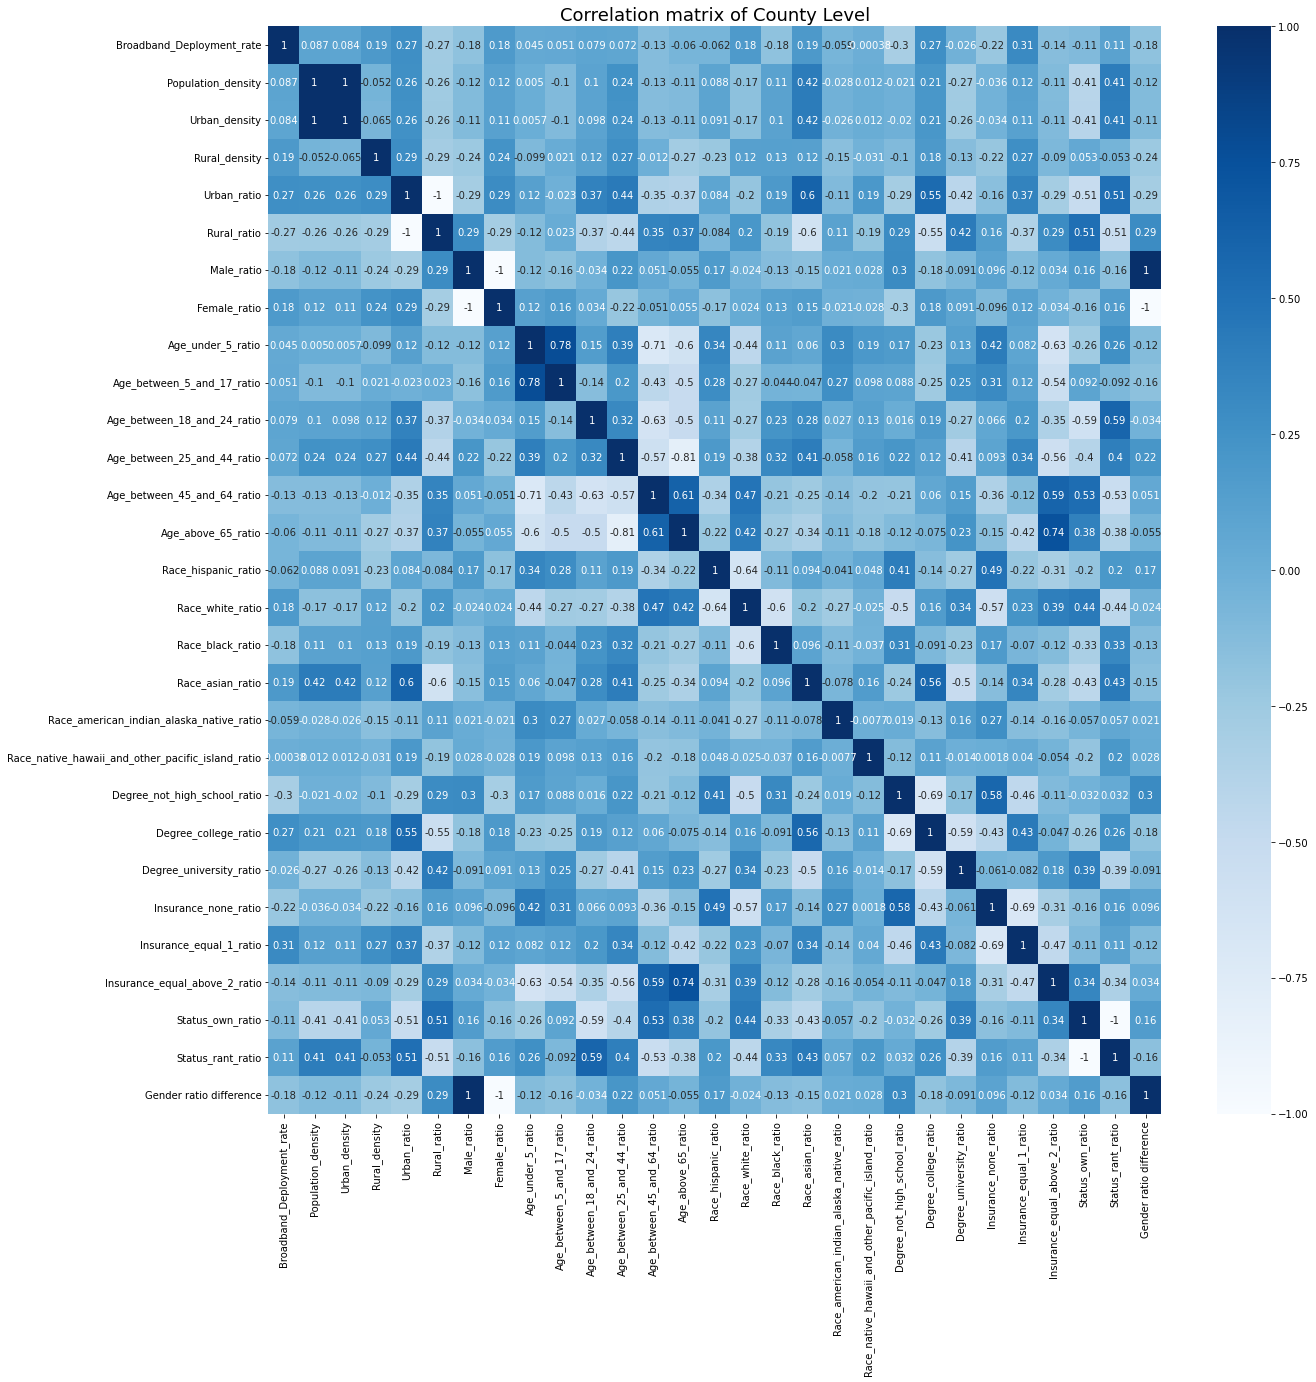

In [20]:
data_county2 = data_county.drop(['County_name'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [21]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

Broadband_Deployment_rate    1.000000
Insurance_equal_1_ratio      0.310492
Urban_ratio                  0.268830
Degree_college_ratio         0.267515
Rural_density                0.186748
Race_asian_ratio             0.186127
Race_white_ratio             0.176806
Female_ratio                 0.176047
Status_rant_ratio            0.106052
Population_density           0.087151
Urban_density                0.084338
Name: Broadband_Deployment_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

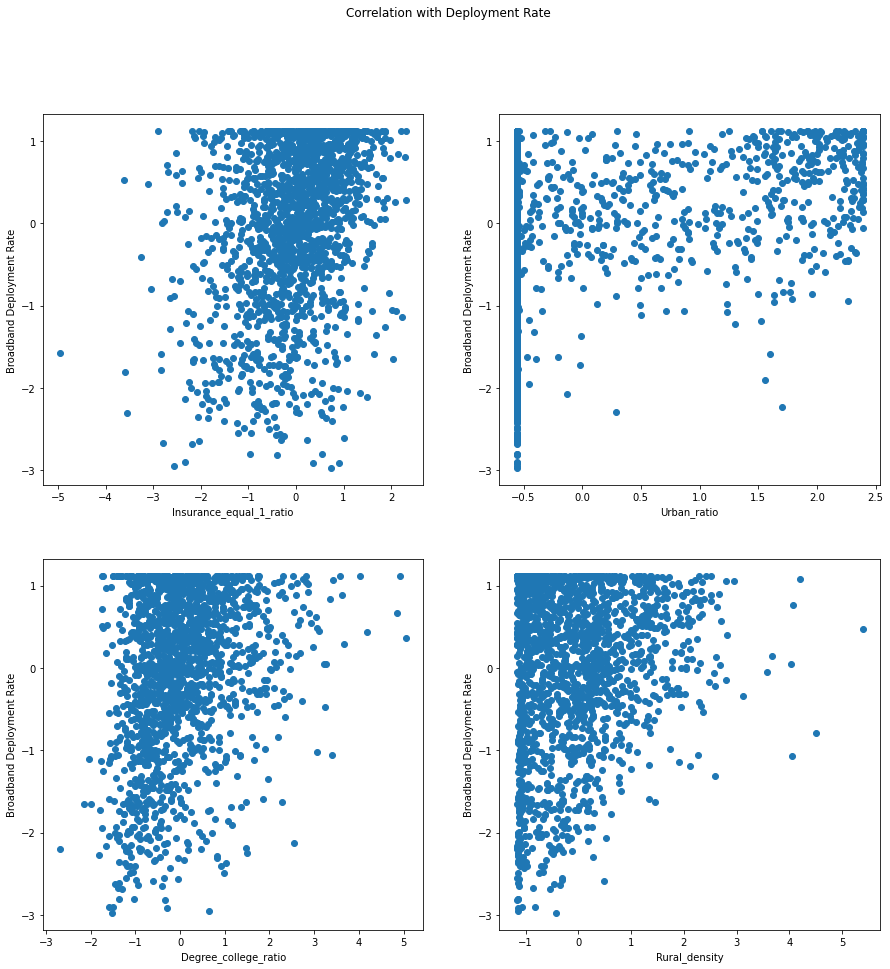

In [22]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['Insurance_equal_1_ratio'],data_county2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['Urban_ratio'],data_county2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Urban_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['Degree_college_ratio'],data_county2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Degree_college_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Rural_density'],data_county2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Rural_density")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#### 4. Regression

In [23]:
lr = LinearRegression()
X = data_county2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_county2['Broadband_Deployment_rate']
lr.fit(X,y)

LinearRegression()

In [24]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
23,Insurance_equal_1_ratio,6.295331e+13
22,Insurance_none_ratio,5.702248e+13
24,Insurance_equal_above_2_ratio,4.652563e+13
26,Status_rant_ratio,2.568653e+13
25,Status_own_ratio,2.568653e+13
20,Degree_college_ratio,1.286687e+13
19,Degree_not_high_school_ratio,1.035185e+13
21,Degree_university_ratio,9.325128e+12
5,Male_ratio,9.011872e+12
6,Female_ratio,8.650976e+12
